## Visualizing the Data and EDA

Author: Shreya Das

This Jyputer notebook is visualizing the data and doing preliminary EDA to figure out what the data looks like. This step will help us understand which ML model or even DL model will work for the data. We have 2 datasets here: AB and Tau (both datasets were curated by Xiao Da).

In [239]:
# Create a virtual environment to install all our dependencies

# Create a new project directory to save project 1
#! mkdir project1

# Then install virtualenv package to be able to make a virtual environment
#! pip install virtualenv

# Then create and name the environment (enter this in the terminal)
#! python 3.12.1 -m venv bil_project_env

# Activate the created environment
#! source bil_project_env/bin/activate


In [240]:
import pandas as pd

## Amyloid-Beta Data: EPVS Only

In [241]:
# Read-in Amyloid-beta csv file
data_AB = pd.read_csv("/Users/dasmaster/BIL Lab Projects/ADNI_PET_AB_EPVS_DTI_ALPS.csv")

data_AB.head()

,PTID,VISCODE,SCANDATE_AB_tx,id,EXAMDATE.x,VISCODE_MRI,PET_Days,EPVS_Caudate_Putamen,EPVS_bg,EPVS_bg_large_box,...,PIB_bl,AV45_bl,FBB_bl,Years_bl,Month_bl,Month,M,update_stamp,AGE_Actual,PET_Years
0,002_S_0295,m60,2011-06-10,002_S_0295_2011-06-02,2011-06-02,v06,8,250.0,334.0,678.0,...,NaN,NaN,NaN,5.06502,60.6557,60.0,60.0,2023-07-07 04:59:43.0,89.86502,0.021903
1,002_S_0413,m132,2019-08-13,002_S_0413_2017-06-21,2017-06-21,init,783,NaN,NaN,NaN,...,NaN,NaN,NaN,11.10470,132.9840,132.0,132.0,2023-07-07 04:59:44.0,87.40470,2.143737
2,002_S_0413,m60,2011-06-20,002_S_0413_2011-06-16,2011-06-16,v06,4,178.0,190.0,303.0,...,NaN,NaN,NaN,5.10609,61.1475,60.0,60.0,2023-07-07 04:59:44.0,81.40609,0.010951
3,002_S_0685,m60,2012-08-07,002_S_0685_2011-07-08,2011-07-08,v06,396,217.0,237.0,500.0,...,NaN,NaN,NaN,4.95825,59.3770,60.0,60.0,2023-07-07 04:59:46.0,94.55825,1.084189
4,002_S_0729,m60,2012-08-02,002_S_0729_2011-08-16,2011-08-16,v06,352,333.0,360.0,571.0,...,NaN,NaN,NaN,4.99932,59.8689,60.0,60.0,2023-07-07 04:59:46.0,70.09932,0.963723


Based on this initial look at the data we have many features to use. Our next steps is to determine which features would be best to use for our ML model in the next step. One of the issues we have to deal with is missing data in specific columns. Additionally, some columns are repetative in terms of what they measure; it's important that we try not to use this repetative data as it provides no extra benefit to the performance of the model.

In [242]:
# Dimensions of our data
data_AB.shape

(1009, 174)

Additionally, we have 1009 patients and 174 features.

Let's see what the proportion of diagnosis ("DX").

In [243]:
import matplotlib.pylab as plt

import seaborn as sns

Text(0.5, 0, 'Diagnosis')

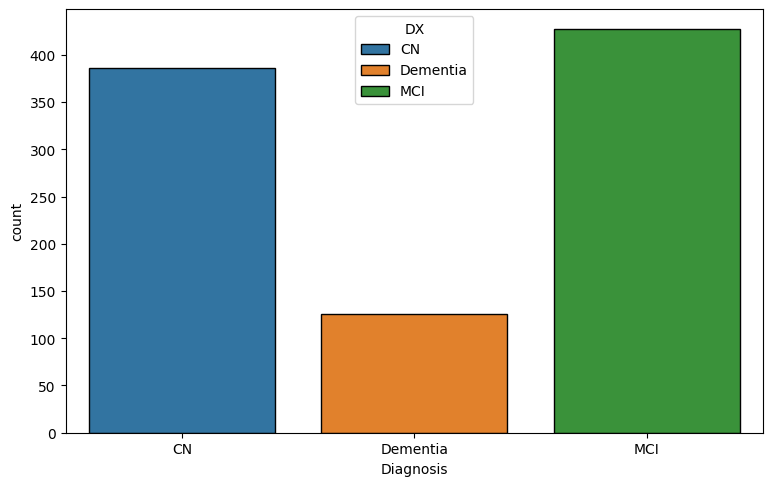

In [244]:
plt.figure(figsize=(9, 5.5))

sns.countplot(x='DX', data = data_AB, edgecolor = 'black', hue ='DX')

plt.xlabel("Diagnosis")

We have 5 categories: Normal (CN), LMCI, EMCI, AD, and SMC.

Before we build the data, let's see which categories have the most null data

In [245]:
data_AB.isnull().sum()

PTID              0
VISCODE           0
SCANDATE_AB_tx    0
id                0
EXAMDATE.x        0
                 ..
Month             1
M                 1
update_stamp      1
AGE_Actual        1
PET_Years         0
Length: 174, dtype: int64

We see that all of columns have missing data values (some even completely missing data). We are going to set the benchmark to be 50%; that is, if 50% of the data is missing we will drop the column from the training for the model. Let's see which columns have more than 505 missing values:

One of one research goals is to use ALPS to predict Amyloid Beta burden, however we see that we don't have enough data. Depending on the first model we make, we may decide to go back to using ALPS measures too.

The columns that we are going to drop is the id columns, data fields, any code fields, ALPS measures, PIB, FBB, DIGISCOR, DIGISCOR_bl, PIL_bl, FBB_bl

In [246]:
# select specific columns
selection = ["DX", "EPVS_Caudate_Putamen","EPVS_bg","EPVS_bg_large_box","EPVS_Caudate_Putamen_vol","EPVS_bg_vol","EPVS_bg_large_box_vol", "wm.lh.frontal.lobe","wm.lh.cingulate.lobe","wm.lh.occiptal.lobe","wm.lh.temporal.lobe","wm.lh.parietal.lobe","wm.lh.insula.lobe","wm.lh.CSO","wm.rh.frontal.lobe","wm.rh.cingulate.lobe","wm.rh.occiptal.lobe","wm.rh.temporal.lobe","wm.rh.parietal.lobe","wm.rh.insula.lobe","wm.rh.CSO","wm.lh.frontal.lobe_vol","wm.lh.cingulate.lobe_vol","wm.lh.occiptal.lobe_vol","wm.lh.temporal.lobe_vol","wm.lh.parietal.lobe_vol","wm.lh.insula.lobe_vol","wm.lh.CSO_vol","wm.rh.frontal.lobe_vol","wm.rh.cingulate.lobe_vol","wm.rh.occiptal.lobe_vol","wm.rh.temporal.lobe_vol","wm.rh.parietal.lobe_vol","wm.rh.insula.lobe_vol","wm.rh.CSO_vol","total_FS_space", "AGE_Actual", "PTGENDER", "PET_Days", "ICV"]

data_AB_EPVS_demo = data_AB[selection]

In [247]:
data_AB_EPVS_demo

,DX,EPVS_Caudate_Putamen,EPVS_bg,EPVS_bg_large_box,EPVS_Caudate_Putamen_vol,EPVS_bg_vol,EPVS_bg_large_box_vol,wm.lh.frontal.lobe,wm.lh.cingulate.lobe,wm.lh.occiptal.lobe,...,wm.rh.occiptal.lobe_vol,wm.rh.temporal.lobe_vol,wm.rh.parietal.lobe_vol,wm.rh.insula.lobe_vol,wm.rh.CSO_vol,total_FS_space,AGE_Actual,PTGENDER,PET_Days,ICV
0,CN,250.0,334.0,678.0,16152.0,21180.0,189215.0,514.0,0.0,0.0,...,24075.0,31957.0,52217.0,10123.0,27670.0,2269.0,89.86502,Male,8,1677520.0
1,CN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,87.40470,Female,783,1508700.0
2,CN,178.0,190.0,303.0,13785.0,17859.0,144720.0,691.0,3.0,0.0,...,22890.0,29218.0,44530.0,8373.0,26273.0,2910.0,81.40609,Female,4,1554590.0
3,CN,217.0,237.0,500.0,17075.0,21422.0,172900.0,274.0,0.0,0.0,...,22227.0,27072.0,42162.0,8856.0,29826.0,1668.0,94.55825,Female,396,1529370.0
4,Dementia,333.0,360.0,571.0,15934.0,20317.0,145920.0,476.0,0.0,0.0,...,15956.0,22549.0,39743.0,7744.0,25071.0,2521.0,70.09932,Female,352,1312870.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004,MCI,54.0,74.0,379.0,13255.0,17296.0,171864.0,522.0,0.0,0.0,...,17804.0,24793.0,38368.0,7709.0,21584.0,1794.0,82.70000,Female,19,1484590.0
1005,CN,47.0,65.0,171.0,10071.0,12709.0,134680.0,204.0,21.0,0.0,...,22491.0,26778.0,35953.0,7554.0,14391.0,925.0,76.70000,Female,29,1486580.0
1006,CN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,81.38446,Female,24,1491060.0
1007,CN,53.0,53.0,124.0,14714.0,19279.0,153180.0,395.0,1.0,0.0,...,23400.0,30800.0,50181.0,9887.0,30860.0,1105.0,72.50000,Female,14,1464970.0


In [248]:
# Drop rows with at least 1 missing value:
data_AB_EPVS_demo = data_AB_EPVS_demo.dropna()

In [249]:
data_AB_EPVS_demo

,DX,EPVS_Caudate_Putamen,EPVS_bg,EPVS_bg_large_box,EPVS_Caudate_Putamen_vol,EPVS_bg_vol,EPVS_bg_large_box_vol,wm.lh.frontal.lobe,wm.lh.cingulate.lobe,wm.lh.occiptal.lobe,...,wm.rh.occiptal.lobe_vol,wm.rh.temporal.lobe_vol,wm.rh.parietal.lobe_vol,wm.rh.insula.lobe_vol,wm.rh.CSO_vol,total_FS_space,AGE_Actual,PTGENDER,PET_Days,ICV
0,CN,250.0,334.0,678.0,16152.0,21180.0,189215.0,514.0,0.0,0.0,...,24075.0,31957.0,52217.0,10123.0,27670.0,2269.0,89.86502,Male,8,1677520.0
2,CN,178.0,190.0,303.0,13785.0,17859.0,144720.0,691.0,3.0,0.0,...,22890.0,29218.0,44530.0,8373.0,26273.0,2910.0,81.40609,Female,4,1554590.0
3,CN,217.0,237.0,500.0,17075.0,21422.0,172900.0,274.0,0.0,0.0,...,22227.0,27072.0,42162.0,8856.0,29826.0,1668.0,94.55825,Female,396,1529370.0
4,Dementia,333.0,360.0,571.0,15934.0,20317.0,145920.0,476.0,0.0,0.0,...,15956.0,22549.0,39743.0,7744.0,25071.0,2521.0,70.09932,Female,352,1312870.0
6,MCI,395.0,446.0,820.0,17638.0,22580.0,172569.0,469.0,2.0,1.0,...,19106.0,31324.0,51137.0,9465.0,31277.0,2155.0,62.76646,Male,362,1701320.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1001,CN,68.0,93.0,265.0,13117.0,17479.0,142848.0,819.0,1.0,14.0,...,19849.0,29018.0,44628.0,8434.0,24497.0,3047.0,76.50000,Female,28,1373520.0
1003,MCI,118.0,124.0,352.0,17595.0,23048.0,166400.0,1840.0,0.0,3.0,...,24049.0,36083.0,52759.0,10139.0,36896.0,5322.0,81.40000,Male,7,1656910.0
1004,MCI,54.0,74.0,379.0,13255.0,17296.0,171864.0,522.0,0.0,0.0,...,17804.0,24793.0,38368.0,7709.0,21584.0,1794.0,82.70000,Female,19,1484590.0
1005,CN,47.0,65.0,171.0,10071.0,12709.0,134680.0,204.0,21.0,0.0,...,22491.0,26778.0,35953.0,7554.0,14391.0,925.0,76.70000,Female,29,1486580.0


We want to encode the diagnosis and gender as numbers. 

Diagnosis: CN = 0, Dementia = 1, MCI = 2

Genoder: Male = 0, Female = 1

First let's check the unique values in each of these columns.

In [250]:
import numpy as np

print("The unique diagnosis before encoding are: ", np.unique(data_AB_EPVS_demo['DX']))

The unique diagnosis before encoding are:  ['CN' 'Dementia' 'MCI']


In [251]:
print("The unique gender before encoding are: ", np.unique(data_AB_EPVS_demo['PTGENDER']))

The unique gender before encoding are:  ['Female' 'Male']


In [252]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

y = data_AB_EPVS_demo['DX'].values

data_AB_EPVS_demo['DX_encoded'] = list(le.fit_transform(y))

print("The unique diagnosis after encoding are: ", np.unique(data_AB_EPVS_demo['DX_encoded']))

The unique diagnosis after encoding are:  [0 1 2]


/var/folders/6r/nx6jkx254q31jrf83vmvvwhw0000gn/T/ipykernel_92326/2540286565.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_AB_EPVS_demo['DX_encoded'] = list(le.fit_transform(y))


In [253]:
le = LabelEncoder()

y = data_AB_EPVS_demo['PTGENDER'].values

data_AB_EPVS_demo['PTGENDER_encoded'] = le.fit_transform(y)

print("The unique gender after encoding are: ", np.unique(data_AB_EPVS_demo['PTGENDER_encoded']))

The unique gender after encoding are:  [0 1]


/var/folders/6r/nx6jkx254q31jrf83vmvvwhw0000gn/T/ipykernel_92326/800405630.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_AB_EPVS_demo['PTGENDER_encoded'] = le.fit_transform(y)


In [254]:
data_AB_EPVS_demo = data_AB_EPVS_demo.drop(labels=["DX", "PTGENDER"], axis =1)

data_AB_EPVS_demo

,EPVS_Caudate_Putamen,EPVS_bg,EPVS_bg_large_box,EPVS_Caudate_Putamen_vol,EPVS_bg_vol,EPVS_bg_large_box_vol,wm.lh.frontal.lobe,wm.lh.cingulate.lobe,wm.lh.occiptal.lobe,wm.lh.temporal.lobe,...,wm.rh.temporal.lobe_vol,wm.rh.parietal.lobe_vol,wm.rh.insula.lobe_vol,wm.rh.CSO_vol,total_FS_space,AGE_Actual,PET_Days,ICV,DX_encoded,PTGENDER_encoded
0,250.0,334.0,678.0,16152.0,21180.0,189215.0,514.0,0.0,0.0,47.0,...,31957.0,52217.0,10123.0,27670.0,2269.0,89.86502,8,1677520.0,0,1
2,178.0,190.0,303.0,13785.0,17859.0,144720.0,691.0,3.0,0.0,2.0,...,29218.0,44530.0,8373.0,26273.0,2910.0,81.40609,4,1554590.0,0,0
3,217.0,237.0,500.0,17075.0,21422.0,172900.0,274.0,0.0,0.0,33.0,...,27072.0,42162.0,8856.0,29826.0,1668.0,94.55825,396,1529370.0,0,0
4,333.0,360.0,571.0,15934.0,20317.0,145920.0,476.0,0.0,0.0,24.0,...,22549.0,39743.0,7744.0,25071.0,2521.0,70.09932,352,1312870.0,1,0
6,395.0,446.0,820.0,17638.0,22580.0,172569.0,469.0,2.0,1.0,4.0,...,31324.0,51137.0,9465.0,31277.0,2155.0,62.76646,362,1701320.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1001,68.0,93.0,265.0,13117.0,17479.0,142848.0,819.0,1.0,14.0,60.0,...,29018.0,44628.0,8434.0,24497.0,3047.0,76.50000,28,1373520.0,0,0
1003,118.0,124.0,352.0,17595.0,23048.0,166400.0,1840.0,0.0,3.0,32.0,...,36083.0,52759.0,10139.0,36896.0,5322.0,81.40000,7,1656910.0,2,1
1004,54.0,74.0,379.0,13255.0,17296.0,171864.0,522.0,0.0,0.0,3.0,...,24793.0,38368.0,7709.0,21584.0,1794.0,82.70000,19,1484590.0,2,0
1005,47.0,65.0,171.0,10071.0,12709.0,134680.0,204.0,21.0,0.0,0.0,...,26778.0,35953.0,7554.0,14391.0,925.0,76.70000,29,1486580.0,0,0


We are going to export this data to use to build 1 model.

In [255]:
data_AB_EPVS_demo.to_csv("data_AB_EPVS_demo_preprocessed.csv", index=False)

## ALPS and Demographics only

We are going to do this for ALPS + demo and EPVS/ALPS + demo:

In [256]:
# select specific columns
selection = ["DX", "alps_L_D5mm","alps_R_D5mm","alps_D5mm","alps_L_D10mm","alps_R_D10mm","alps_D10mm", "AGE_Actual", "PTGENDER", "ICV"]

data_AB_ALPS_demo = data_AB[selection]

In [257]:
data_AB_ALPS_demo

,DX,alps_L_D5mm,alps_R_D5mm,alps_D5mm,alps_L_D10mm,alps_R_D10mm,alps_D10mm,AGE_Actual,PTGENDER,ICV
0,CN,NaN,NaN,NaN,NaN,NaN,NaN,89.86502,Male,1677520.0
1,CN,0.973851,1.089255,1.031553,0.933234,0.993671,0.963453,87.40470,Female,1508700.0
2,CN,NaN,NaN,NaN,NaN,NaN,NaN,81.40609,Female,1554590.0
3,CN,NaN,NaN,NaN,NaN,NaN,NaN,94.55825,Female,1529370.0
4,Dementia,NaN,NaN,NaN,NaN,NaN,NaN,70.09932,Female,1312870.0
...,...,...,...,...,...,...,...,...,...,...
1004,MCI,NaN,NaN,NaN,NaN,NaN,NaN,82.70000,Female,1484590.0
1005,CN,NaN,NaN,NaN,NaN,NaN,NaN,76.70000,Female,1486580.0
1006,CN,1.412073,1.462173,1.437123,1.296552,1.309524,1.303038,81.38446,Female,1491060.0
1007,CN,NaN,NaN,NaN,NaN,NaN,NaN,72.50000,Female,1464970.0


In [258]:
# Drop rows with at least 1 missing value:
data_AB_ALPS_demo = data_AB_ALPS_demo.dropna()

data_AB_ALPS_demo

,DX,alps_L_D5mm,alps_R_D5mm,alps_D5mm,alps_L_D10mm,alps_R_D10mm,alps_D10mm,AGE_Actual,PTGENDER,ICV
1,CN,0.973851,1.089255,1.031553,0.933234,0.993671,0.963453,87.40470,Female,1508700.0
5,MCI,0.990283,1.008532,0.999408,0.950487,0.937304,0.943896,68.09160,Male,1580700.0
7,MCI,1.267503,1.412383,1.339943,1.176360,1.253717,1.215038,81.14240,Female,1413030.0
10,CN,1.264732,1.194741,1.229736,1.186008,1.129800,1.157904,80.70960,Female,1341450.0
17,CN,1.255363,1.498242,1.376802,1.181088,1.308691,1.244890,83.90828,Female,1433040.0
...,...,...,...,...,...,...,...,...,...,...
998,CN,1.276938,1.127971,1.202454,1.172850,1.064784,1.118817,76.53997,Male,1410950.0
1000,MCI,1.126747,1.206072,1.166410,1.066231,1.113176,1.089703,85.94545,Male,1595150.0
1002,CN,1.734027,1.588321,1.661174,1.525161,1.376238,1.450699,83.03799,Female,1351980.0
1006,CN,1.412073,1.462173,1.437123,1.296552,1.309524,1.303038,81.38446,Female,1491060.0


In [259]:
import numpy as np

print("The unique diagnosis before encoding are: ", np.unique(data_AB_ALPS_demo['DX']))
print("The unique gender before encoding are: ", np.unique(data_AB_ALPS_demo['PTGENDER']))

The unique diagnosis before encoding are:  ['CN' 'Dementia' 'MCI']
The unique gender before encoding are:  ['Female' 'Male']


In [260]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

y = data_AB_ALPS_demo['DX'].values

data_AB_ALPS_demo['DX_encoded'] = list(le.fit_transform(y))

print("The unique diagnosis after encoding are: ", np.unique(data_AB_ALPS_demo['DX_encoded']))

y = data_AB_ALPS_demo['PTGENDER'].values

data_AB_ALPS_demo['PTGENDER_encoded'] = le.fit_transform(y)

print("The unique gender after encoding are: ", np.unique(data_AB_ALPS_demo['PTGENDER_encoded']))

The unique diagnosis after encoding are:  [0 1 2]
The unique gender after encoding are:  [0 1]


/var/folders/6r/nx6jkx254q31jrf83vmvvwhw0000gn/T/ipykernel_92326/1600094429.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_AB_ALPS_demo['DX_encoded'] = list(le.fit_transform(y))
/var/folders/6r/nx6jkx254q31jrf83vmvvwhw0000gn/T/ipykernel_92326/1600094429.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_AB_ALPS_demo['PTGENDER_encoded'] = le.fit_transform(y)


In [261]:
data_AB_ALPS_demo = data_AB_ALPS_demo.drop(labels=["DX", "PTGENDER"], axis =1)

data_AB_ALPS_demo

,alps_L_D5mm,alps_R_D5mm,alps_D5mm,alps_L_D10mm,alps_R_D10mm,alps_D10mm,AGE_Actual,ICV,DX_encoded,PTGENDER_encoded
1,0.973851,1.089255,1.031553,0.933234,0.993671,0.963453,87.40470,1508700.0,0,0
5,0.990283,1.008532,0.999408,0.950487,0.937304,0.943896,68.09160,1580700.0,2,1
7,1.267503,1.412383,1.339943,1.176360,1.253717,1.215038,81.14240,1413030.0,2,0
10,1.264732,1.194741,1.229736,1.186008,1.129800,1.157904,80.70960,1341450.0,0,0
17,1.255363,1.498242,1.376802,1.181088,1.308691,1.244890,83.90828,1433040.0,0,0
...,...,...,...,...,...,...,...,...,...,...
998,1.276938,1.127971,1.202454,1.172850,1.064784,1.118817,76.53997,1410950.0,0,1
1000,1.126747,1.206072,1.166410,1.066231,1.113176,1.089703,85.94545,1595150.0,2,1
1002,1.734027,1.588321,1.661174,1.525161,1.376238,1.450699,83.03799,1351980.0,0,0
1006,1.412073,1.462173,1.437123,1.296552,1.309524,1.303038,81.38446,1491060.0,0,0


In [262]:
data_AB_ALPS_demo.to_csv("data_AB_ALPS_demo_preprocessed.csv", index=False)

## ALPS, EPVS and Demographics
Now we will do the same steps including ALPS, EPVS and demo.

In [263]:
data_AB_EPVS_ALPS = pd.read_csv("/Users/dasmaster/BIL Lab Projects/ADNI_PET_AB_EPVS_DTI_ALPS_Both_Final.csv")

Text(0.5, 0, 'Diagnosis')

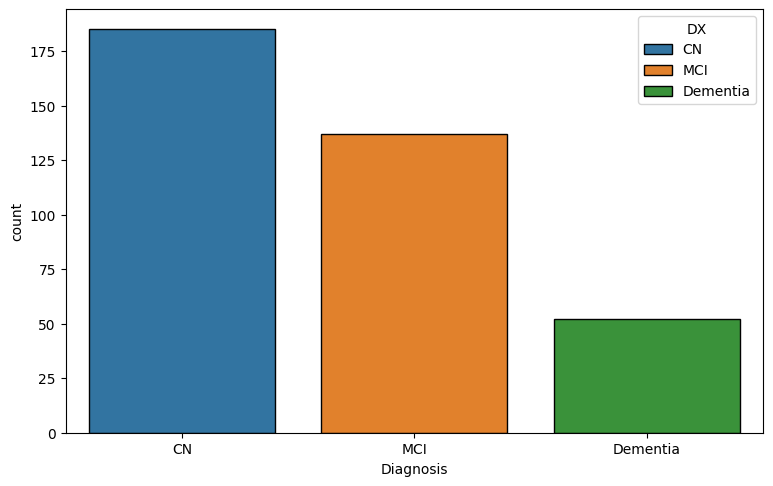

In [264]:
plt.figure(figsize=(9, 5.5))

sns.countplot(x='DX', data = data_AB_EPVS_ALPS, edgecolor = 'black', hue ='DX')

plt.xlabel("Diagnosis")

In [265]:
# select specific columns
selection = ["DX", "EPVS_Caudate_Putamen","EPVS_bg","EPVS_bg_large_box","EPVS_Caudate_Putamen_vol","EPVS_bg_vol","EPVS_bg_large_box_vol", "wm.lh.frontal.lobe","wm.lh.cingulate.lobe","wm.lh.occiptal.lobe","wm.lh.temporal.lobe","wm.lh.parietal.lobe","wm.lh.insula.lobe","wm.lh.CSO","wm.rh.frontal.lobe","wm.rh.cingulate.lobe","wm.rh.occiptal.lobe","wm.rh.temporal.lobe","wm.rh.parietal.lobe","wm.rh.insula.lobe","wm.rh.CSO","wm.lh.frontal.lobe_vol","wm.lh.cingulate.lobe_vol","wm.lh.occiptal.lobe_vol","wm.lh.temporal.lobe_vol","wm.lh.parietal.lobe_vol","wm.lh.insula.lobe_vol","wm.lh.CSO_vol","wm.rh.frontal.lobe_vol","wm.rh.cingulate.lobe_vol","wm.rh.occiptal.lobe_vol","wm.rh.temporal.lobe_vol","wm.rh.parietal.lobe_vol","wm.rh.insula.lobe_vol","wm.rh.CSO_vol","total_FS_space", "alps_L_D5mm","alps_R_D5mm","alps_D5mm","alps_L_D10mm","alps_R_D10mm","alps_D10mm", "AGE_Actual", "PTGENDER", "ICV"]

data_AB_EPVS_ALPS_demo = data_AB_EPVS_ALPS[selection]

In [266]:
# Drop rows with at least 1 missing value:
data_AB_EPVS_ALPS_demo = data_AB_EPVS_ALPS_demo.dropna()

data_AB_EPVS_ALPS_demo

,DX,EPVS_Caudate_Putamen,EPVS_bg,EPVS_bg_large_box,EPVS_Caudate_Putamen_vol,EPVS_bg_vol,EPVS_bg_large_box_vol,wm.lh.frontal.lobe,wm.lh.cingulate.lobe,wm.lh.occiptal.lobe,...,total_FS_space,alps_L_D5mm,alps_R_D5mm,alps_D5mm,alps_L_D10mm,alps_R_D10mm,alps_D10mm,AGE_Actual,PTGENDER,ICV
0,CN,143,158,284,14046,18549,156128,493,3,0,...,2249,0.973851,1.089255,1.031553,0.933234,0.993671,0.963453,87.40470,Female,1508700.0
1,MCI,362,382,700,17947,22868,174580,322,3,2,...,1666,0.990283,1.008532,0.999408,0.950487,0.937304,0.943896,68.09160,Male,1580700.0
2,MCI,31,38,148,13980,18560,141636,334,0,15,...,2722,1.267503,1.412383,1.339943,1.176360,1.253717,1.215038,81.14240,Female,1413030.0
3,CN,100,105,244,17585,22019,152760,593,9,6,...,2566,1.264732,1.194741,1.229736,1.186008,1.129800,1.157904,80.70960,Female,1341450.0
4,CN,97,97,184,13907,17501,183680,347,6,1,...,1753,1.255363,1.498242,1.376802,1.181088,1.308691,1.244890,83.90828,Female,1433040.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
389,CN,101,101,170,15146,19397,166026,227,0,0,...,1334,1.276938,1.127971,1.202454,1.172850,1.064784,1.118817,76.53997,Male,1410950.0
390,MCI,251,257,771,17394,21720,201600,1019,4,9,...,5697,1.126747,1.206072,1.166410,1.066231,1.113176,1.089703,85.94545,Male,1595150.0
391,CN,36,89,265,13431,17317,139490,429,0,22,...,2353,1.734027,1.588321,1.661174,1.525161,1.376238,1.450699,83.03799,Female,1351980.0
392,CN,93,104,163,13622,17470,149040,161,0,0,...,837,1.412073,1.462173,1.437123,1.296552,1.309524,1.303038,81.38446,Female,1491060.0


In [268]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

y = data_AB_EPVS_ALPS_demo['DX'].values

data_AB_EPVS_ALPS_demo['DX_encoded'] = list(le.fit_transform(y))

print("The unique diagnosis after encoding are: ", np.unique(data_AB_EPVS_ALPS_demo['DX_encoded']))

y = data_AB_EPVS_ALPS_demo['PTGENDER'].values

data_AB_EPVS_ALPS_demo['PTGENDER_encoded'] = le.fit_transform(y)

print("The unique gender after encoding are: ", np.unique(data_AB_EPVS_ALPS_demo['PTGENDER_encoded']))

The unique diagnosis after encoding are:  [0 1 2]
The unique gender after encoding are:  [0 1]


In [269]:
data_AB_EPVS_ALPS_demo = data_AB_EPVS_ALPS_demo.drop(labels=["DX", "PTGENDER"], axis =1)

data_AB_EPVS_ALPS_demo

,EPVS_Caudate_Putamen,EPVS_bg,EPVS_bg_large_box,EPVS_Caudate_Putamen_vol,EPVS_bg_vol,EPVS_bg_large_box_vol,wm.lh.frontal.lobe,wm.lh.cingulate.lobe,wm.lh.occiptal.lobe,wm.lh.temporal.lobe,...,alps_L_D5mm,alps_R_D5mm,alps_D5mm,alps_L_D10mm,alps_R_D10mm,alps_D10mm,AGE_Actual,ICV,DX_encoded,PTGENDER_encoded
0,143,158,284,14046,18549,156128,493,3,0,8,...,0.973851,1.089255,1.031553,0.933234,0.993671,0.963453,87.40470,1508700.0,0,0
1,362,382,700,17947,22868,174580,322,3,2,3,...,0.990283,1.008532,0.999408,0.950487,0.937304,0.943896,68.09160,1580700.0,2,1
2,31,38,148,13980,18560,141636,334,0,15,52,...,1.267503,1.412383,1.339943,1.176360,1.253717,1.215038,81.14240,1413030.0,2,0
3,100,105,244,17585,22019,152760,593,9,6,27,...,1.264732,1.194741,1.229736,1.186008,1.129800,1.157904,80.70960,1341450.0,0,0
4,97,97,184,13907,17501,183680,347,6,1,24,...,1.255363,1.498242,1.376802,1.181088,1.308691,1.244890,83.90828,1433040.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
389,101,101,170,15146,19397,166026,227,0,0,10,...,1.276938,1.127971,1.202454,1.172850,1.064784,1.118817,76.53997,1410950.0,0,1
390,251,257,771,17394,21720,201600,1019,4,9,81,...,1.126747,1.206072,1.166410,1.066231,1.113176,1.089703,85.94545,1595150.0,2,1
391,36,89,265,13431,17317,139490,429,0,22,30,...,1.734027,1.588321,1.661174,1.525161,1.376238,1.450699,83.03799,1351980.0,0,0
392,93,104,163,13622,17470,149040,161,0,0,0,...,1.412073,1.462173,1.437123,1.296552,1.309524,1.303038,81.38446,1491060.0,0,0


In [270]:
data_AB_EPVS_ALPS_demo.to_csv("data_AB_EPVS_ALPS_demo_preprocessed.csv", index=False)